In [1]:
import sys
import math
import random
import numpy as np
from numpy.random import seed

sys.path.append('.')
sys.path.append('../../')

%load_ext autoreload
%autoreload 2
from graph_creation import create_graph
from network_classes import Network, Node, Edge

In [2]:
cherrypicked_seed = 42

seed(cherrypicked_seed)
random.seed(cherrypicked_seed)

# Test graph creation

## First example - node types and percentages

In [3]:
N1 = Network(n_nodes=185, alpha=0.25, beta=0.5, delta_in=1, delta_out=1, 
             homophily=0.8, n_commons=180, n_influencers=5, n_bots=0, 
             n_fact_checkers=0, prob_complaint=0.9, prob_infection=0.5, 
             prob_vaccination=0.9, prob_cure=0.1, prob_influencer=0.1, 
             exp_decay=True, user_block=True, prob_echo=0.0)
N1.create_graph()
# Genera 7 numeri random tra 0 e 184
initial_infected_nodes = random.sample(range(0, 184), 7)
N1.set_initial_infected_nodes(initial_infected_nodes)

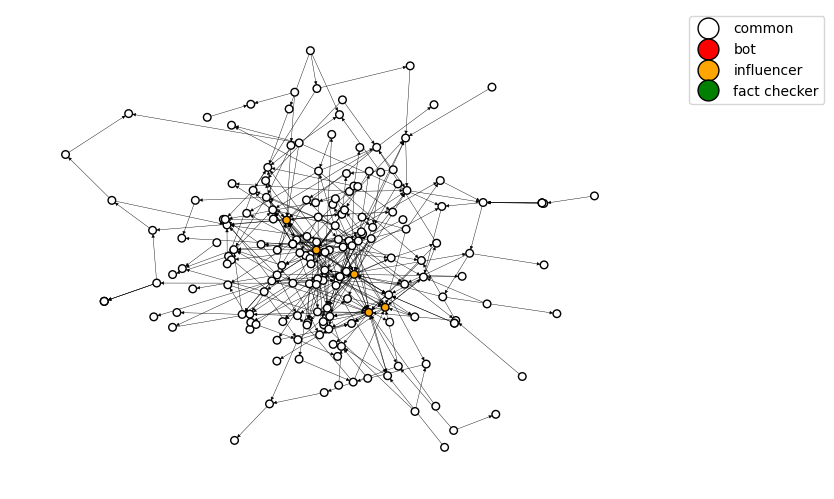

In [4]:
N1.plot_graph_role()

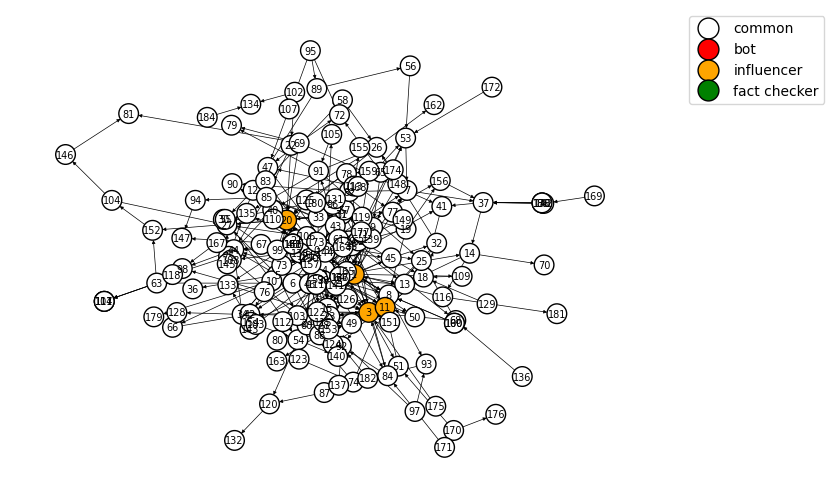

In [5]:
N1.plot_graph_role_with_labels()

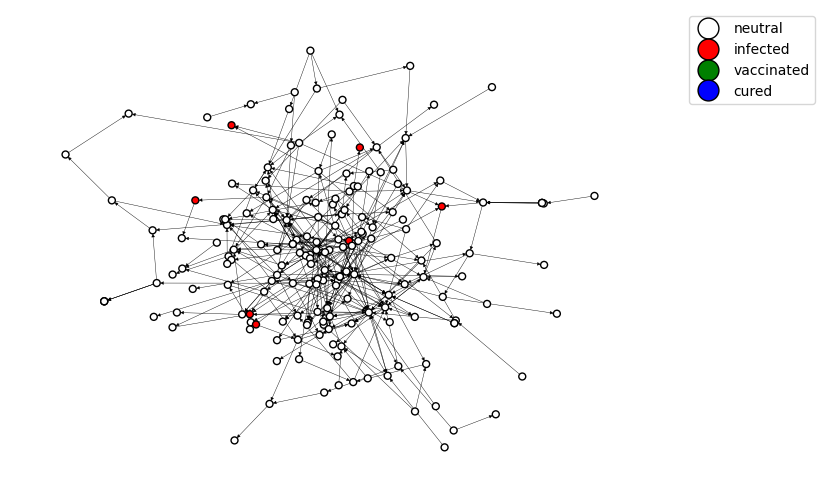

In [6]:
N1.plot_graph_sirv()

In [7]:
print(N1.initial_infected_nodes)

[94, 42, 155, 183, 29, 41, 79]


In [8]:
for i in range(N1.n_nodes):
    if N1.nodes[i].type_sirv == "infected":
        print(i)

29
41
42
79
94
155
183


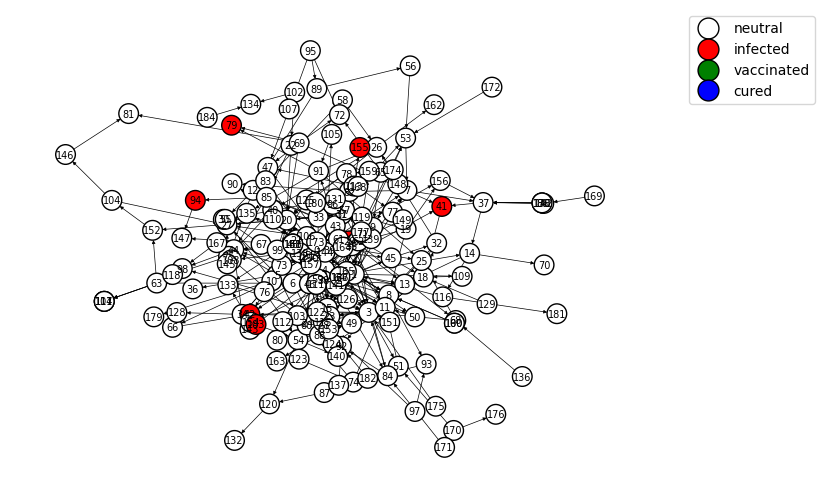

In [9]:
N1.plot_graph_sirv_with_labels()

In [10]:
print(N1.perc_infected)

[3.7837837837837838]


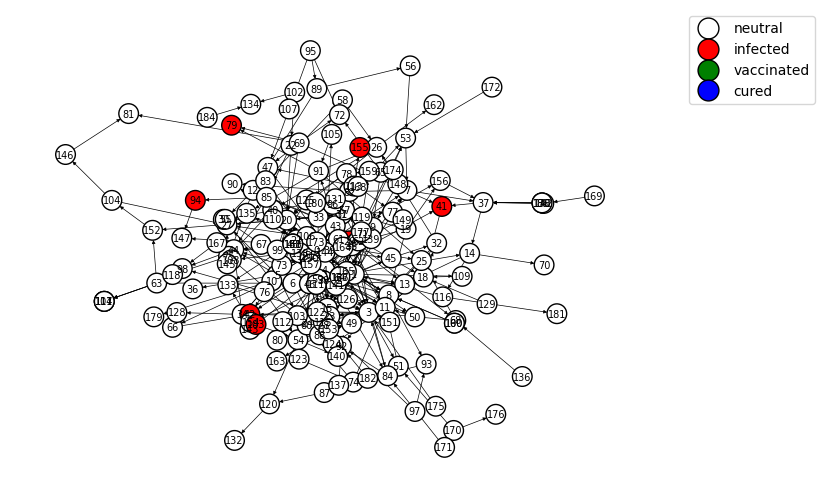

In [11]:
# Ovviamente al primo step non cambia la configurazione della rete dato
# che nello stato iniziale nessun nodo ha ancora pubblicato nulla.
N1.update_nodes()
N1.plot_graph_sirv_with_labels()

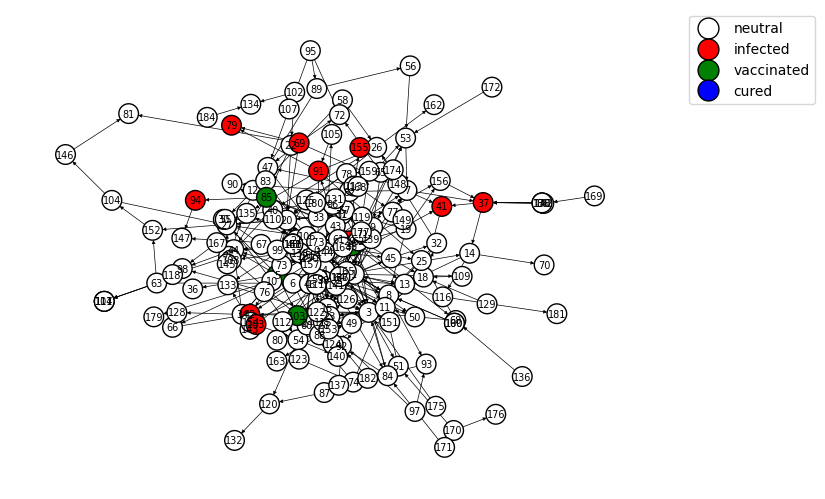

In [12]:
N1.update_nodes()
N1.plot_graph_sirv_with_labels()

In [13]:
for i in range(258):
    N1.update_nodes()

In [14]:
# In tutto eseguiti 260 update + lo stato iniziale = 261
print(len(N1.perc_infected))

261


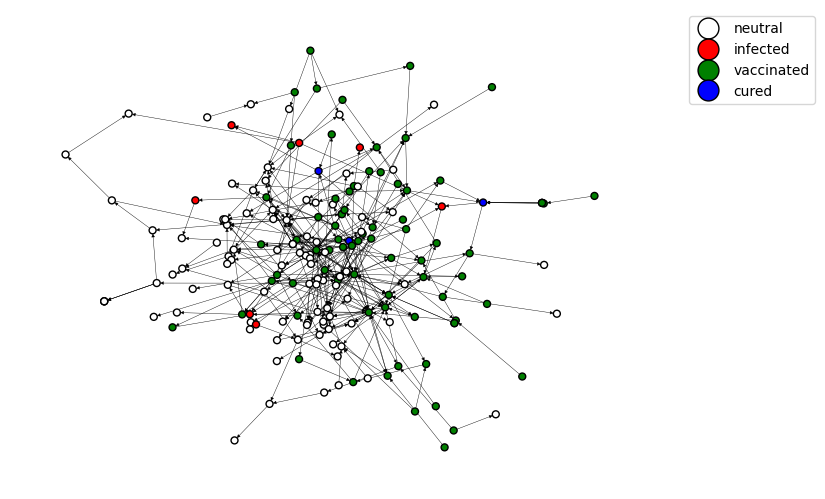

In [15]:
N1.plot_graph_sirv()

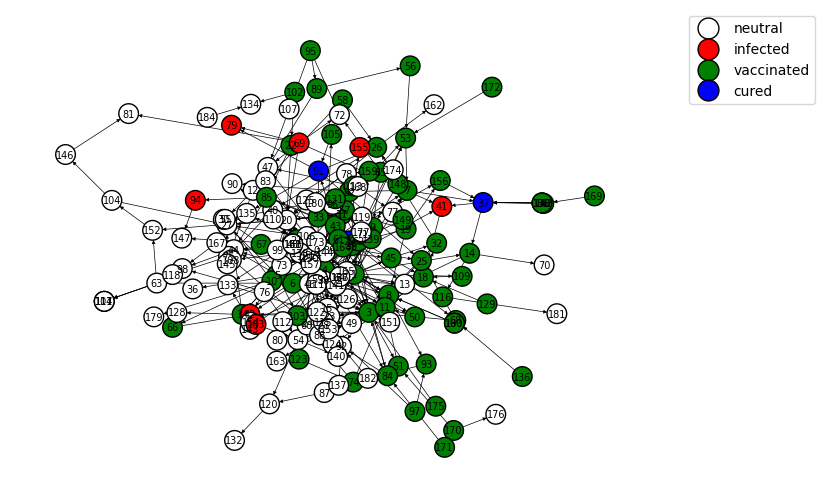

In [16]:
N1.plot_graph_sirv_with_labels()

In [17]:
print(N1.perc_infected[259])

4.324324324324325


In [18]:
print("Number of complaints for node 37: ", N1.nodes[37].number_complaints)
print("Blocked status node 37: ", N1.nodes[37].blocked)

Number of complaints for node 37:  5
Blocked status node 37:  True


In [19]:
N1.n_blocked_nodes

2

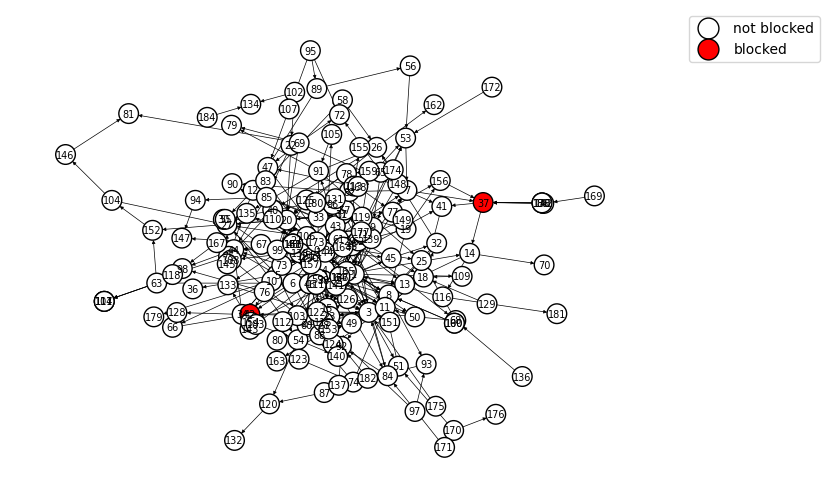

In [20]:
N1.plot_graph_block_with_labels()

## Secon example - probabilities and time

In [21]:
N2 = Network(n_nodes=185, alpha=0.25, beta=0.5, delta_in=1, delta_out=1, 
             homophily=0.8, n_commons=155, n_influencers=10, n_bots=10,
             n_fact_checkers=10, prob_complaint=0.1, prob_infection=0.5, 
             prob_vaccination=0.1, prob_cure=0.1, prob_influencer=0.1, 
             exp_decay=True, user_block=False, prob_echo=0.0)
N2.create_graph()
initial_infected_nodes = random.sample(range(0, 184), 7)
N2.set_initial_infected_nodes(initial_infected_nodes)

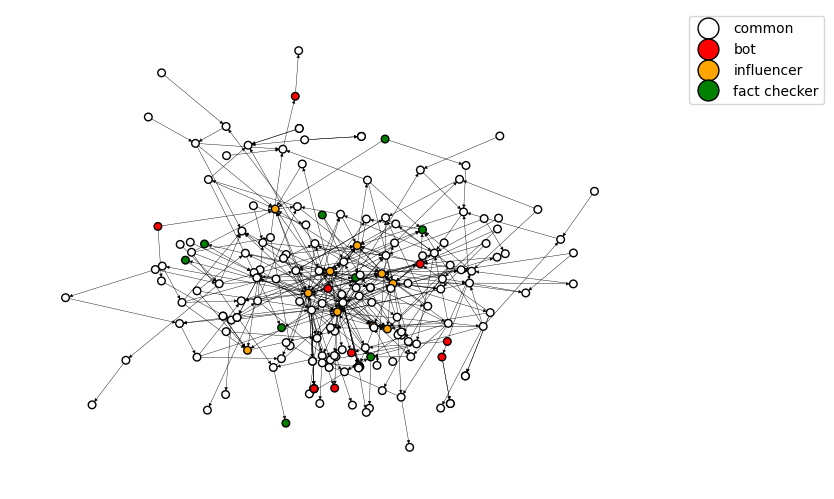

In [22]:
N2.plot_graph_role()

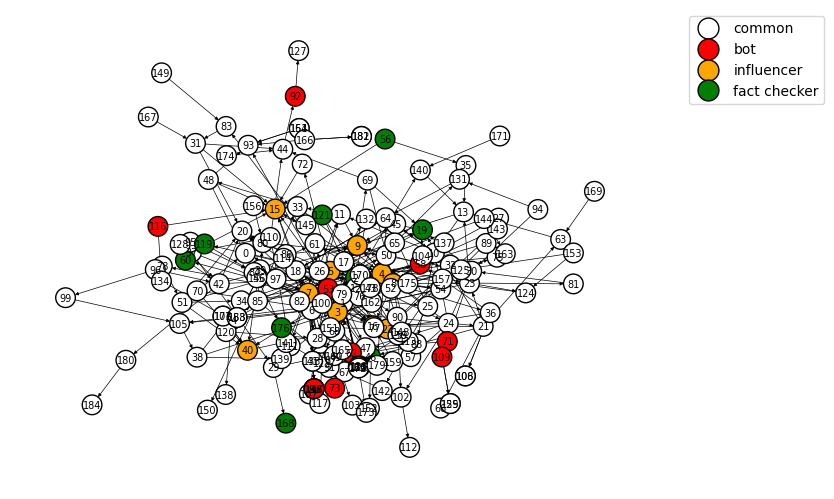

In [23]:
N2.plot_graph_role_with_labels()

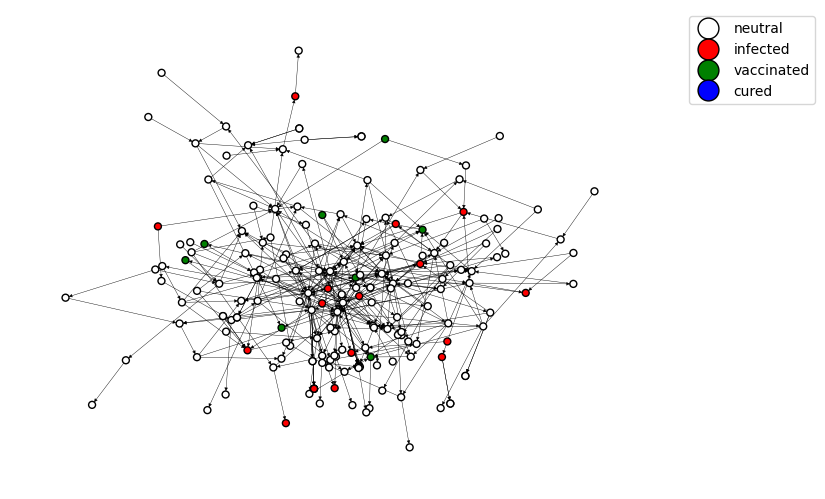

In [24]:
N2.plot_graph_sirv()

In [25]:
print(N2.initial_infected_nodes)

[13, 45, 124, 100, 76, 168, 40]


In [26]:
print(N2.bots)

[58, 71, 147, 92, 62, 53, 116, 109, 73, 106]


In [27]:
for i in range(N2.n_nodes):
    if N2.nodes[i].type_sirv == "infected":
        print(i)

13
40
45
53
58
62
71
73
76
92
100
106
109
116
124
147
168


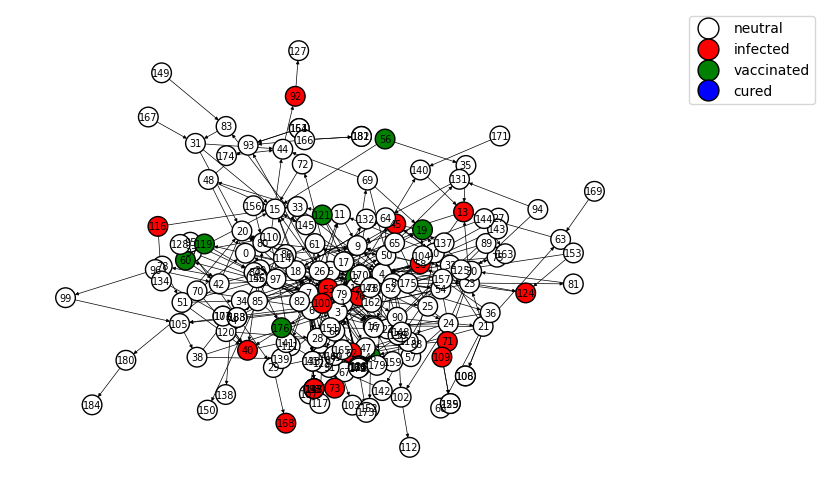

In [28]:
N2.plot_graph_sirv_with_labels()

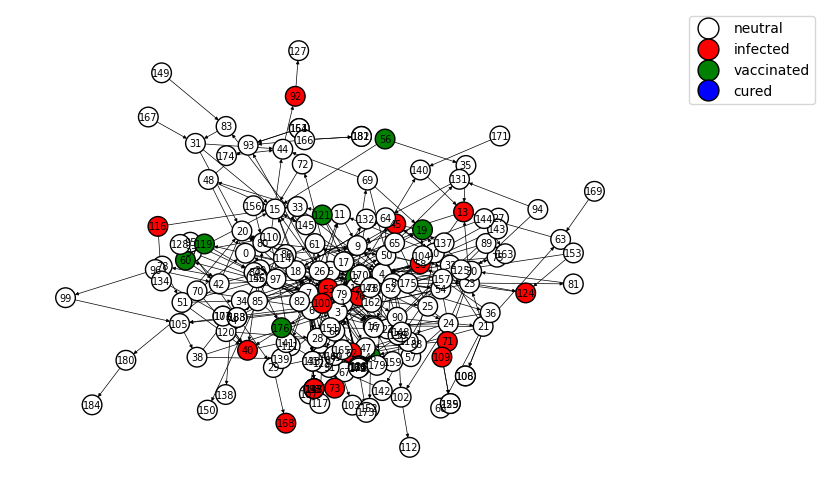

In [29]:
N2.update_nodes()
N2.plot_graph_sirv_with_labels()

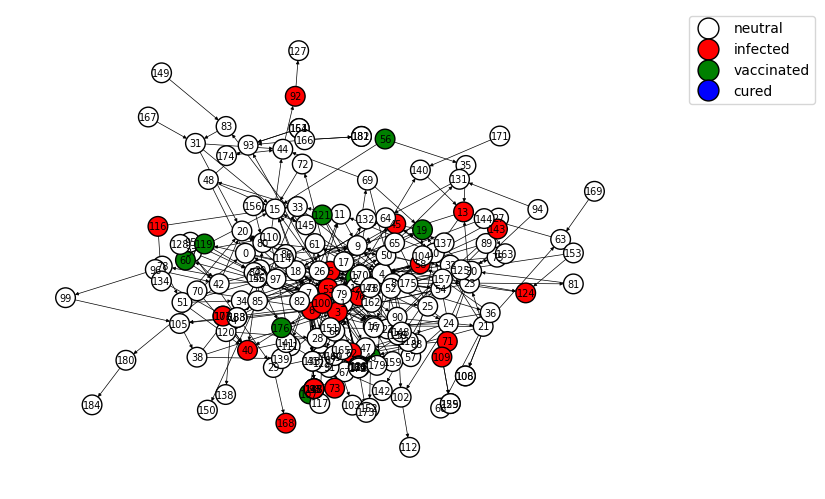

In [30]:
N2.update_nodes()
N2.plot_graph_sirv_with_labels()

In [31]:
for i in range(258):
    N2.update_nodes()

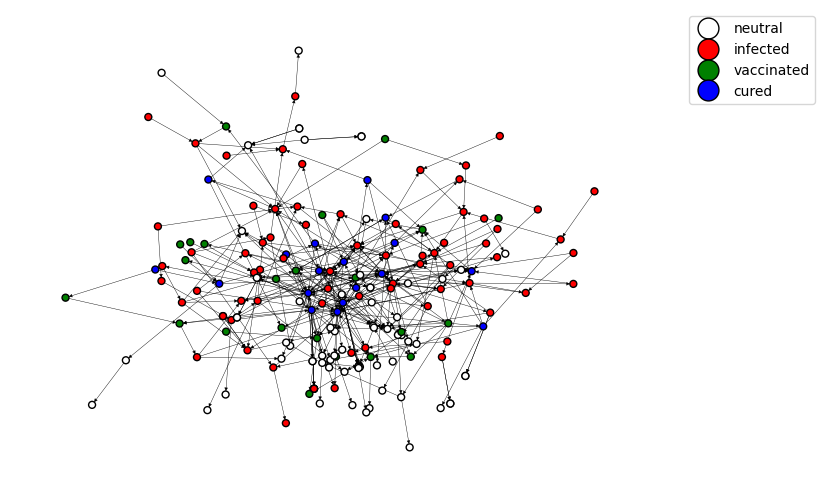

In [32]:
N2.plot_graph_sirv()

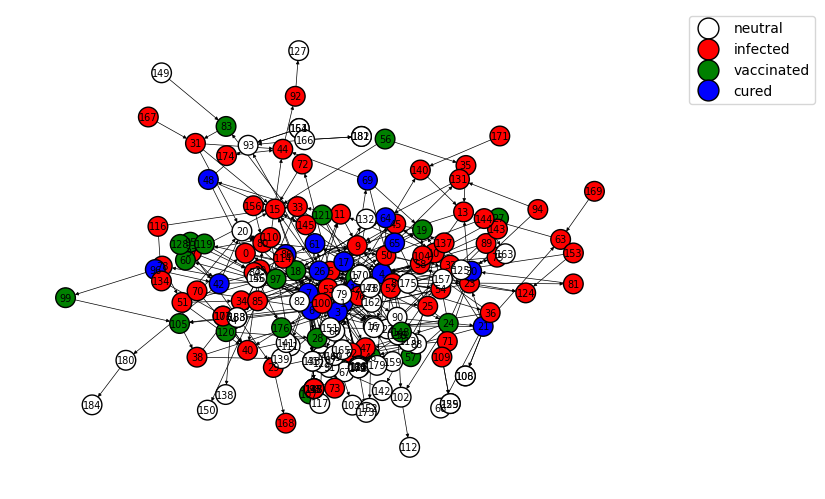

In [33]:
N2.plot_graph_sirv_with_labels()

In [34]:
print(N2.perc_infected[259])

39.45945945945946


In [35]:
# Dati del nodo infetto in mezzo a sinistra
print("Id: ", N2.nodes[86].id)
print("Opinion: ", N2.nodes[86].opinion)
print("Type SIRV: ", N2.nodes[86].type_sirv)
print("Type role: ", N2.nodes[86].type_role)
# Il tempo di partenza è -1. Il primo timestep eseguito è lo 0. Quindi il timestep
# indicato con 1 è in realtà il secondo eseguito.
print("Messages: ", N2.nodes[86].messages)
print("Nodes connected to: ", N2.nodes[86].nodes_connected_to)
print("Influencer probability: ", N2.nodes[86].prob_influencer)
print("Infection probability: ", N2.nodes[86].prob_infection)
print("Vaccination probability: ", N2.nodes[86].prob_vaccination)
print("Cure probability: ", N2.nodes[86].prob_cure)
print("Complaint probability: ", N2.nodes[86].prob_complaint)
print("Infection time: ", N2.nodes[86].time_infection)
print("Vaccination time: ", N2.nodes[86].time_vaccination)
print("Cure time: ", N2.nodes[86].time_cure)
print("Number of complaints: ", N2.nodes[86].number_complaints)
print("Blocked: ", N2.nodes[86].blocked)
print("Users complained: ", N2.nodes[86].users_complained)
print("Previous active timestep: ", N2.nodes[86].prev_timestep)
print("Next active timestep: ", N2.nodes[86].next_timestep)
print("Exponential decay: ", N2.nodes[86].exp_decay)
print("Echo probability: ", N2.nodes[86].prob_echo)

Id:  86
Opinion:  0.2853528900177913
Type SIRV:  cured
Type role:  common
Messages:  {0: 'neutral', 1: 'neutral', 2: 'neutral', 3: 'neutral', 4: 'neutral', 5: 'neutral', 6: 'infected', 7: 'infected', 8: 'infected', 9: 'infected', 10: 'infected', 11: 'infected', 13: '', 14: '', 16: '', 17: '', 19: '', 21: '', 22: '', 24: '', 26: '', 28: '', 30: '', 33: '', 35: '', 38: '', 41: '', 45: '', 49: '', 51: '', 55: '', 58: '', 60: '', 63: '', 78: '', 81: '', 114: '', 237: ''}
Nodes connected to:  [<network_classes.Node object at 0x0000016E7AB83010>, <network_classes.Node object at 0x0000016E7AB83B20>, <network_classes.Node object at 0x0000016E7AB830D0>, <network_classes.Node object at 0x0000016E7AB82E60>]
Influencer probability:  0.1
Infection probability:  0.5
Vaccination probability:  0.1
Cure probability:  0.1
Complaint probability:  0.1
Infection time:  6
Vaccination time:  0
Cure time:  13
Number of complaints:  0
Blocked:  False
Users complained:  []
Previous active timestep:  237
Next ac

## Third example - echo chamber

In [36]:
N3 = Network(n_nodes=185, alpha=0.25, beta=0.5, delta_in=1, delta_out=1, 
             homophily=0.8, n_commons=155, n_influencers=10, n_bots=10,
             n_fact_checkers=10, prob_complaint=0.1, prob_infection=0.5, 
             prob_vaccination=0.1, prob_cure=0.1, prob_influencer=0.1, 
             exp_decay=True, user_block=False, prob_echo=0.0)
N3.create_graph()
initial_infected_nodes = random.sample(range(0, 184), 7)
N3.set_initial_infected_nodes(initial_infected_nodes)

In [37]:
print(N3.initial_infected_nodes)

[0, 181, 147, 4, 12, 16, 161]


In [38]:
print(N3.bots)

[133, 66, 79, 6, 179, 13, 72, 142, 148, 162]


In [39]:
for i in range(N3.n_nodes):
    if N3.nodes[i].type_sirv == "infected":
        print(i)

0
4
6
12
13
16
66
72
79
133
142
147
148
161
162
179
181


In [40]:
print(N3.fact_checkers)

[65, 90, 129, 19, 9, 24, 24, 53, 32, 163]


In [41]:
print(N3.perc_infected)

[9.18918918918919]


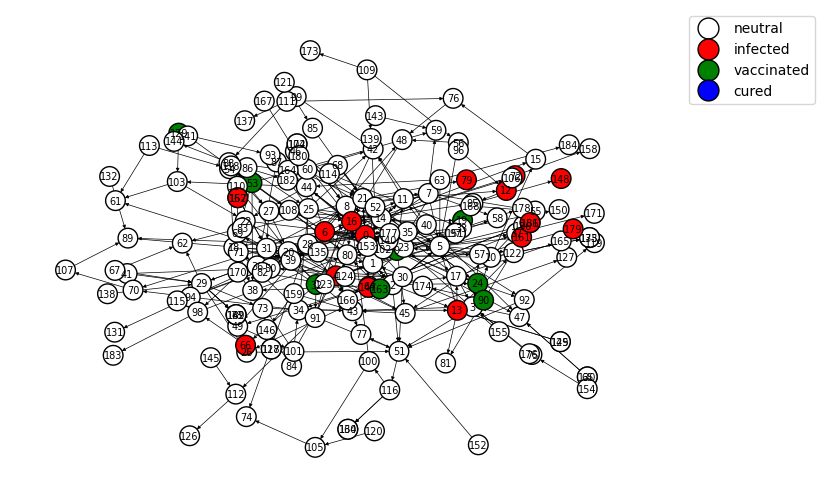

In [42]:
N3.plot_graph_sirv_with_labels()

In [43]:
for i in range(51):
    N3.update_nodes()

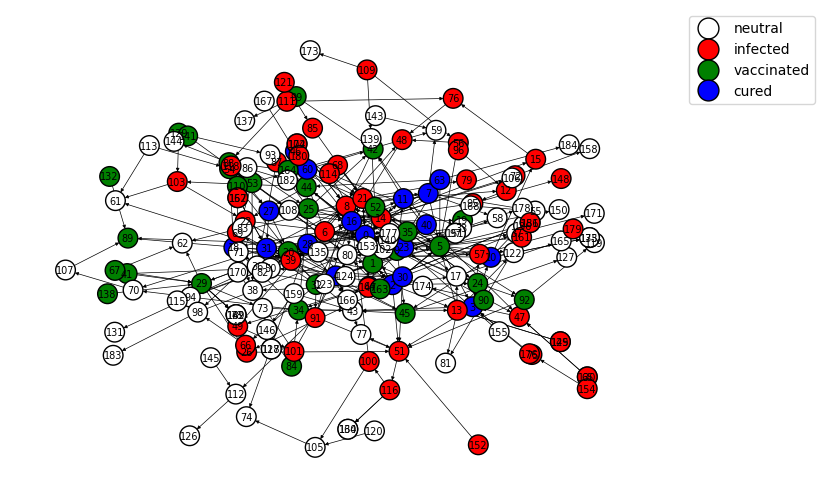

In [44]:
N3.plot_graph_sirv_with_labels()

In [45]:
print(N3.perc_infected[50])

29.72972972972973


In [46]:
print(N3.perc_infected)

[9.18918918918919, 9.18918918918919, 16.216216216216218, 23.783783783783782, 29.72972972972973, 31.35135135135135, 32.972972972972975, 32.432432432432435, 32.432432432432435, 31.89189189189189, 31.89189189189189, 32.432432432432435, 32.432432432432435, 32.432432432432435, 31.89189189189189, 31.89189189189189, 31.35135135135135, 31.35135135135135, 31.89189189189189, 31.89189189189189, 31.35135135135135, 31.35135135135135, 31.35135135135135, 31.35135135135135, 31.35135135135135, 31.35135135135135, 31.35135135135135, 30.81081081081081, 30.81081081081081, 30.81081081081081, 30.81081081081081, 30.27027027027027, 30.27027027027027, 30.27027027027027, 30.27027027027027, 30.27027027027027, 30.27027027027027, 30.27027027027027, 30.27027027027027, 30.27027027027027, 29.72972972972973, 29.72972972972973, 29.72972972972973, 29.72972972972973, 29.72972972972973, 29.72972972972973, 29.72972972972973, 29.72972972972973, 29.72972972972973, 29.72972972972973, 29.72972972972973, 29.72972972972973]


In [47]:
print("Infected from echo chamber: ", N3.infected_from_echo)
print("Vaccinated from echo chamber: ", N3.vaccinated_from_echo)

Infected from echo chamber:  0
Vaccinated from echo chamber:  0


In [48]:
N3.reset_network()

In [49]:
print(N3.initial_infected_nodes)

[0, 181, 147, 4, 12, 16, 161]


In [50]:
for i in range(N3.n_nodes):
    if N3.nodes[i].type_sirv == "infected":
        print(i)

0
4
6
12
13
16
66
72
79
133
142
147
148
161
162
179
181


In [51]:
print(N3.perc_infected)

[9.18918918918919]


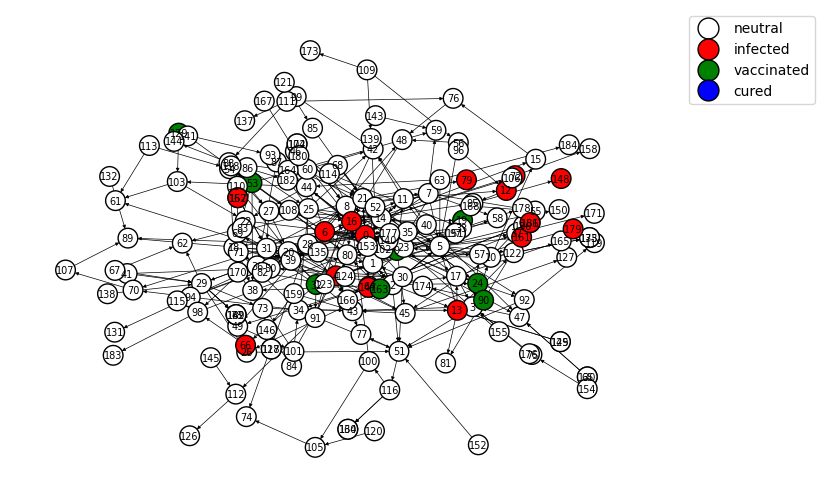

In [52]:
N3.plot_graph_sirv_with_labels()

In [53]:
N3.set_prob_echo(0.5)

In [54]:
for i in range(51):
    N3.update_nodes()

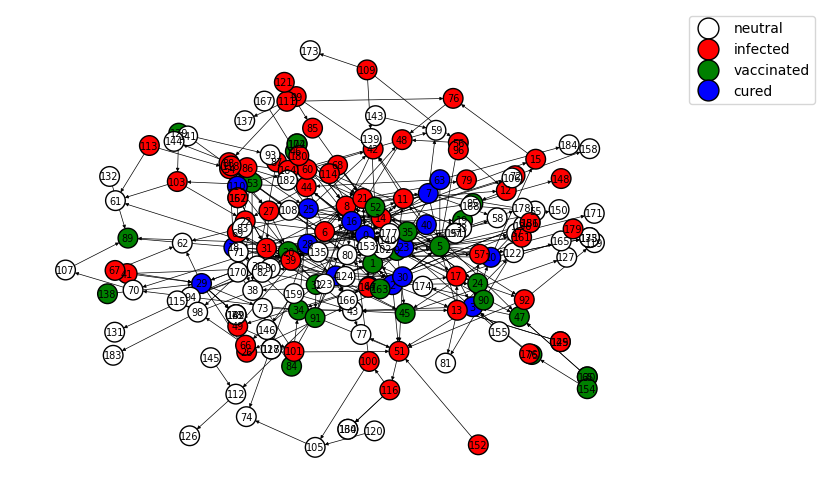

In [55]:
N3.plot_graph_sirv_with_labels()

In [56]:
print(N3.perc_infected[50])

34.5945945945946


In [57]:
print(N3.perc_infected)

[9.18918918918919, 9.18918918918919, 18.37837837837838, 27.027027027027028, 34.5945945945946, 38.91891891891892, 39.45945945945946, 39.45945945945946, 40.54054054054054, 41.62162162162162, 41.08108108108108, 40.54054054054054, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 38.91891891891892, 38.91891891891892, 37.2972972972973, 36.75675675675676, 36.75675675675676, 36.75675675675676, 36.21621621621622, 36.21621621621622, 36.21621621621622, 36.21621621621622, 36.21621621621622, 36.21621621621622, 36.21621621621622, 36.21621621621622, 36.21621621621622, 35.67567567567568, 35.67567567567568, 35.67567567567568, 35.67567567567568, 35.67567567567568, 35.67567567567568, 35.13513513513514, 35.13513513513514, 35.13513513513514, 35.13513513513514, 35.13513513513514, 34.5945945945946, 34.5945945945946, 34.5945945945946, 34.5945945945946, 34.5945945945946, 34.5945945945946, 34.5945945945946, 34.5945945945946]


In [58]:
print("Infected from echo chamber: ", N3.infected_from_echo)
print("Vaccinated from echo chamber: ", N3.vaccinated_from_echo)
print("Cured from echo chamber: ", N3.cured_from_echo)

Infected from echo chamber:  0
Vaccinated from echo chamber:  0
Cured from echo chamber:  0


In [59]:
N3.reset_network()

In [60]:
print(N3.initial_infected_nodes)

[0, 181, 147, 4, 12, 16, 161]


In [61]:
for i in range(N3.n_nodes):
    if N3.nodes[i].type_sirv == "infected":
        print(i)

0
4
6
12
13
16
66
72
79
133
142
147
148
161
162
179
181


In [62]:
print(N3.perc_infected)

[9.18918918918919]


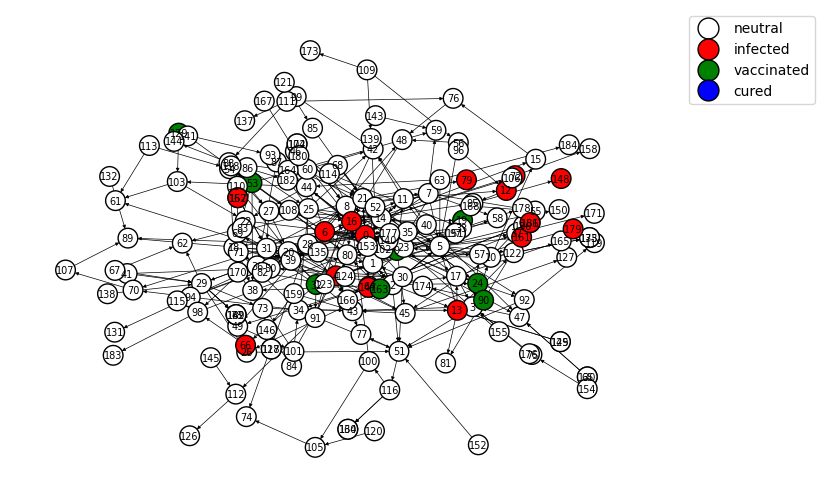

In [63]:
N3.plot_graph_sirv_with_labels()

In [64]:
N3.set_prob_echo(1.0)

In [65]:
for i in range(51):
    N3.update_nodes()

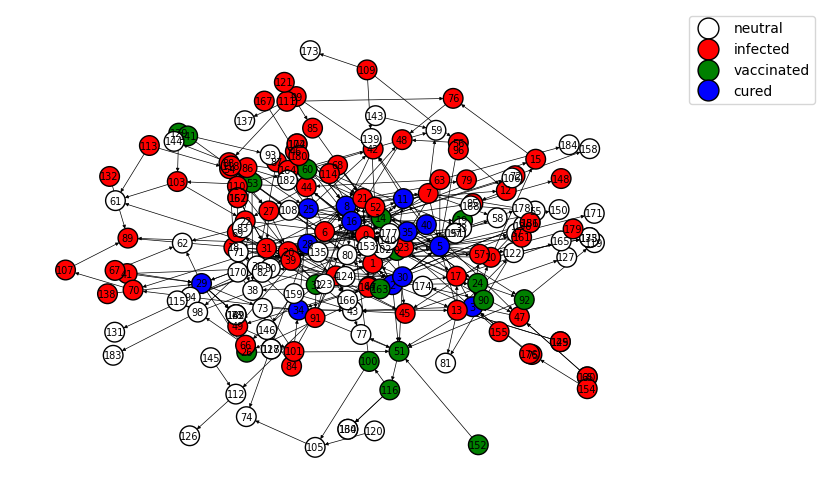

In [66]:
N3.plot_graph_sirv_with_labels()

In [67]:
print(N3.perc_infected[50])

44.86486486486486


In [68]:
print(N3.perc_infected)

[9.18918918918919, 15.135135135135135, 28.64864864864865, 35.67567567567568, 42.7027027027027, 47.567567567567565, 48.648648648648646, 48.648648648648646, 49.729729729729726, 50.270270270270274, 50.270270270270274, 49.729729729729726, 49.729729729729726, 49.189189189189186, 48.648648648648646, 48.108108108108105, 47.027027027027025, 47.027027027027025, 47.027027027027025, 47.027027027027025, 45.945945945945944, 45.945945945945944, 45.945945945945944, 45.945945945945944, 45.4054054054054, 45.4054054054054, 45.4054054054054, 45.4054054054054, 45.4054054054054, 45.4054054054054, 45.4054054054054, 45.4054054054054, 45.4054054054054, 45.4054054054054, 45.4054054054054, 44.86486486486486, 44.86486486486486, 44.86486486486486, 44.86486486486486, 44.86486486486486, 44.86486486486486, 44.86486486486486, 44.86486486486486, 44.86486486486486, 44.86486486486486, 44.86486486486486, 44.86486486486486, 44.86486486486486, 44.86486486486486, 44.86486486486486, 44.86486486486486, 44.86486486486486]


In [69]:
print("Infected from echo chamber: ", N3.infected_from_echo)
print("Vaccinated from echo chamber: ", N3.vaccinated_from_echo)
print("Cured from echo chamber: ", N3.cured_from_echo)

Infected from echo chamber:  37
Vaccinated from echo chamber:  3
Cured from echo chamber:  0


## Fourth example - percentages

In [70]:
N4 = Network(n_nodes=100, alpha=0.25, beta=0.5, delta_in=1, delta_out=1, 
             homophily=0.8, n_commons=90, n_influencers=5, n_bots=5,
             n_fact_checkers=0, prob_complaint=0.1, prob_infection=0.5, 
             prob_vaccination=0.1, prob_cure=0.1, prob_influencer=0.1, 
             exp_decay=True, user_block=False, prob_echo=0.0)
N4.create_graph()
initial_infected_nodes = random.sample(range(0, 100), 7)
N4.set_initial_infected_nodes(initial_infected_nodes)

In [71]:
print(N4.initial_infected_nodes)

[73, 24, 44, 34, 95, 32, 1]


In [72]:
for i in range(N4.n_nodes):
    if N4.nodes[i].type_sirv == "infected":
        print(i)

1
24
32
34
44
46
56
73
74
91
95


In [73]:
print(N4.perc_infected)

[11.0]


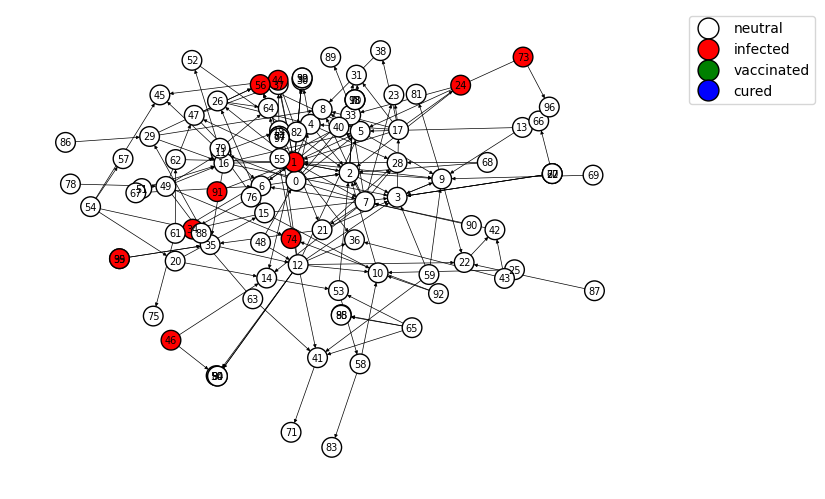

In [74]:
N4.plot_graph_sirv_with_labels()

In [75]:
N4.update_nodes()

In [76]:
for i in range(N4.n_nodes):
    if N4.nodes[i].type_sirv == "infected":
        print(i)

1
24
32
34
44
46
56
73
74
91
95


In [77]:
print(N4.perc_infected)

[11.0, 11.0]


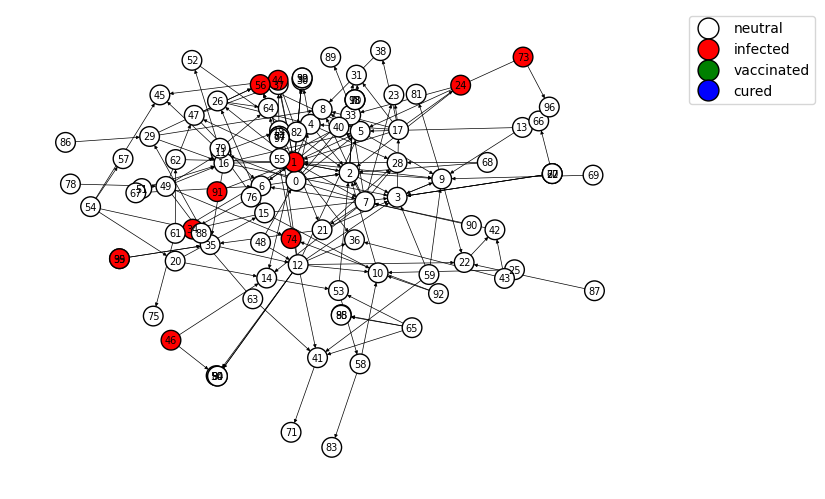

In [78]:
N4.plot_graph_sirv_with_labels()

In [79]:
N4.update_nodes()

In [80]:
for i in range(N4.n_nodes):
    if N4.nodes[i].type_sirv == "infected":
        print(i)

1
2
15
16
24
32
34
44
46
49
54
56
62
63
73
74
77
84
91
95


In [81]:
print(N4.perc_infected)

[11.0, 11.0, 20.0]


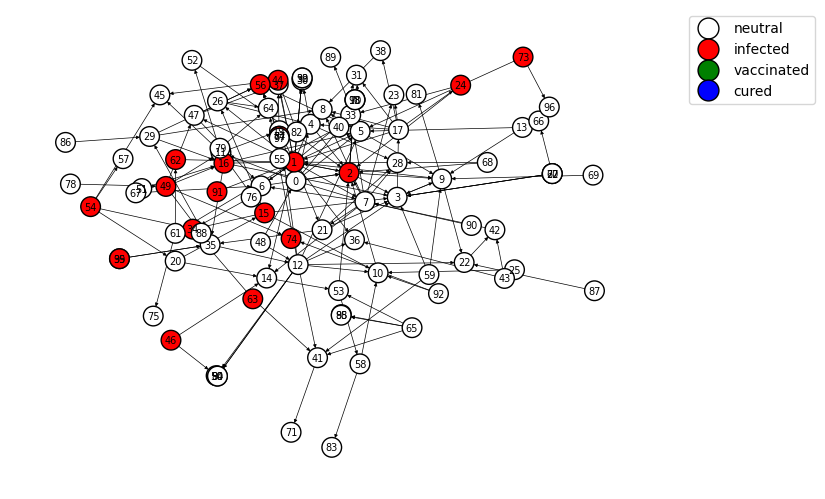

In [82]:
N4.plot_graph_sirv_with_labels()

In [83]:
N4.update_nodes()

In [84]:
count = 0
for i in range(N4.n_nodes):
    if N4.nodes[i].type_sirv == "infected":
        count += 1
print(count)

29


In [85]:
print(N4.perc_infected)

[11.0, 11.0, 20.0, 29.0]


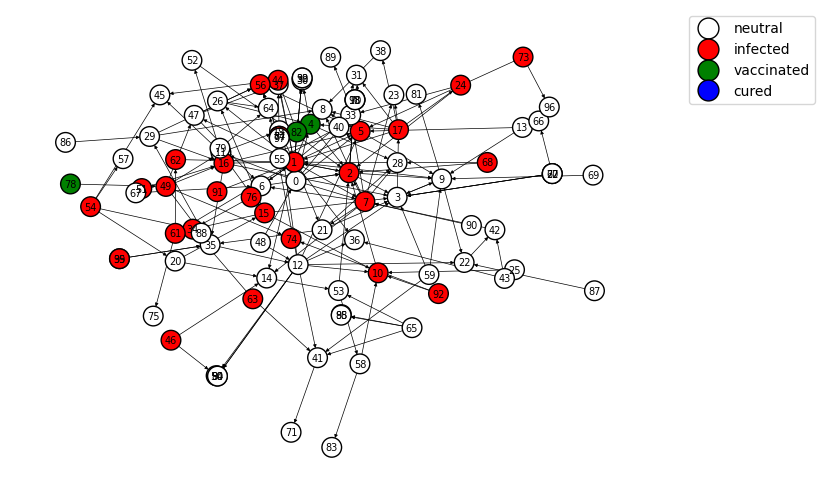

In [86]:
N4.plot_graph_sirv_with_labels()